# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,2
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045,0
115,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.900000,1.71,2.87,407,1
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.850000,0.92,3.20,1060,0
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.680000,1.12,3.48,510,1
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.940000,0.69,2.84,352,1
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065,0
50,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.200000,1.12,2.91,1150,0
86,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.450000,1.33,2.26,495,1
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,2


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

## Data exploration
Firts we want to see if there is some null data.

In [2]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

No null data, now we check for some overview of the data.

In [3]:
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


We want a list with the features, and a variable with the label.

In [4]:
features = data.keys()
label = features[-1]
features = features[0:-1]

### Checking for Outliers
For better understanding of the data we plot by Wine Variety.

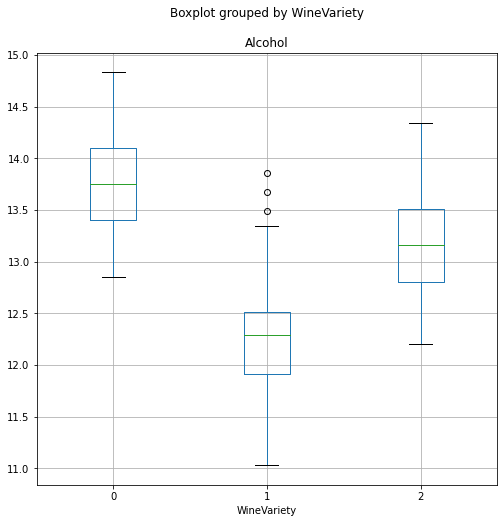

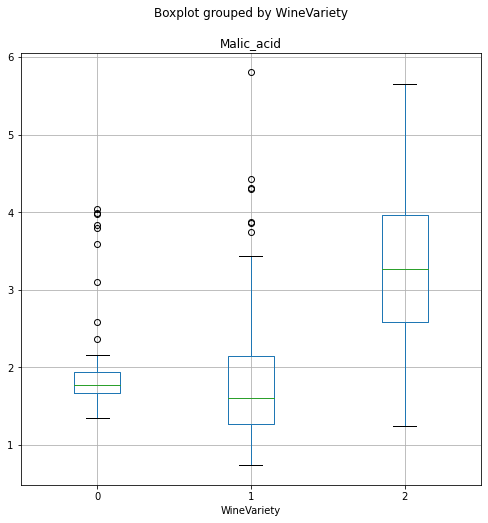

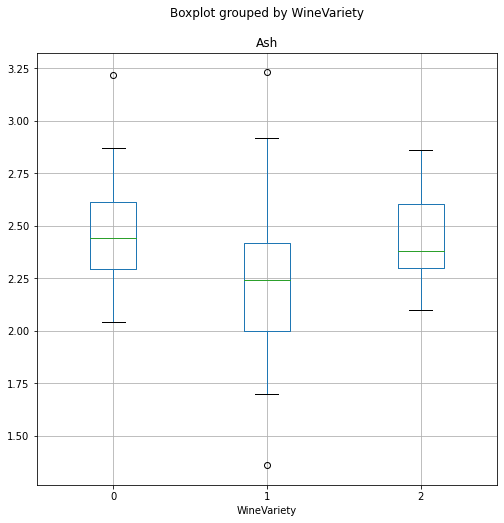

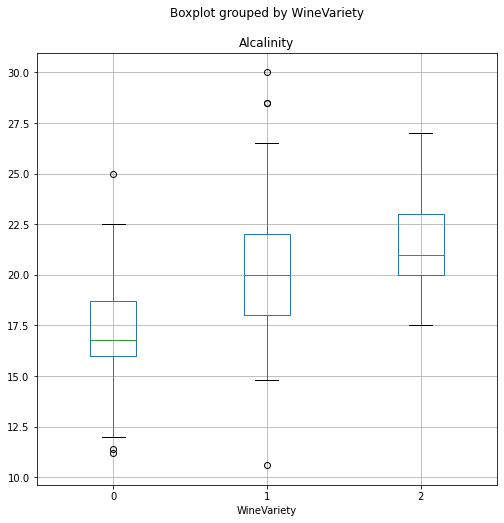

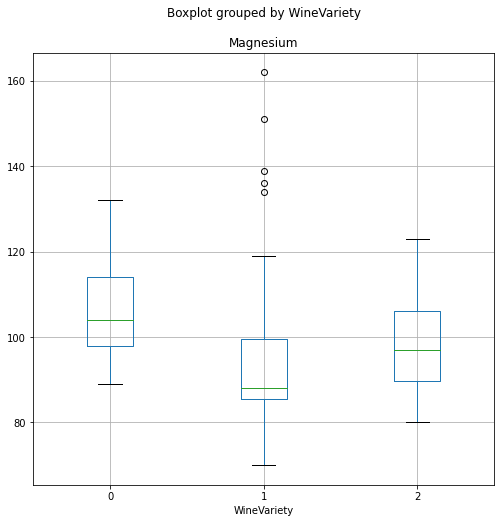

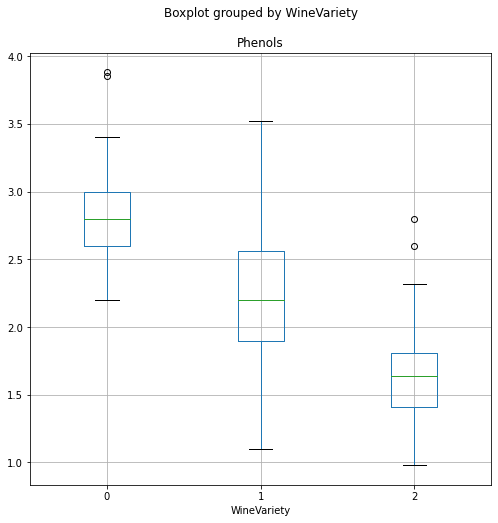

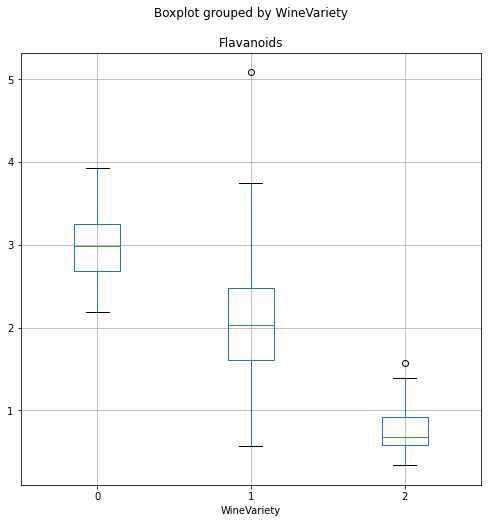

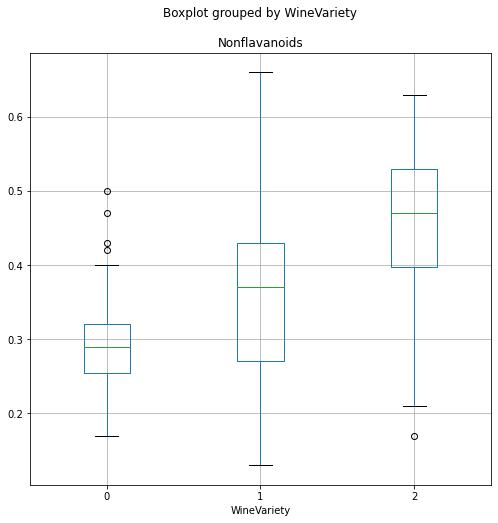

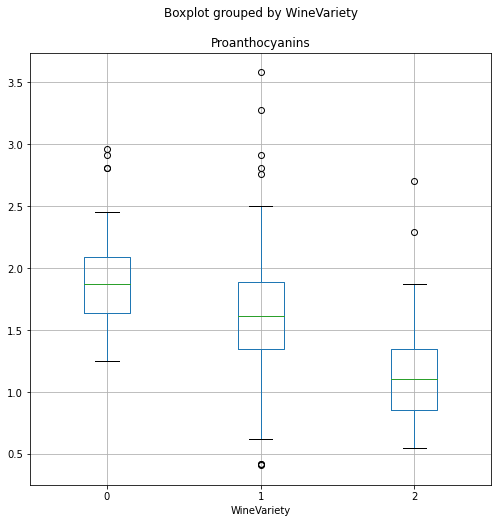

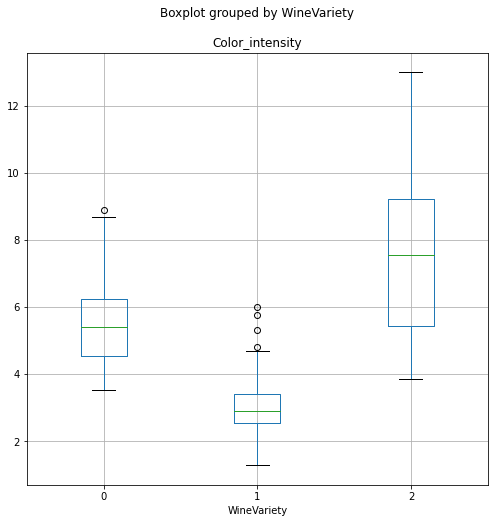

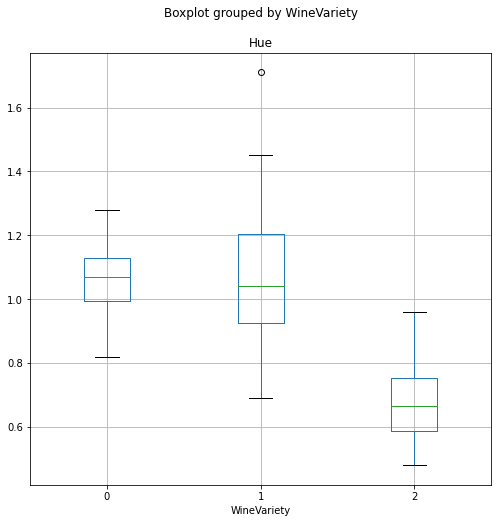

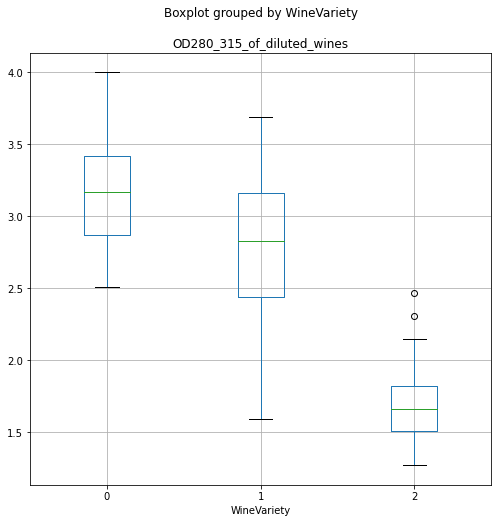

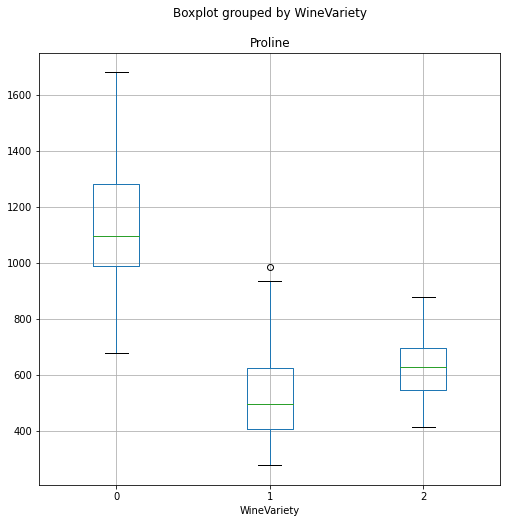

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

#features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    data.boxplot(column=col, by='WineVariety', figsize=(8,8))
    plt.title(col)
plt.show()

As we can see in the plots, the wine varieties have very noticeable differences, this could help the model to not mispredict.
## Training the model
First we split the data into the features and the label also into test and train data.

In [6]:
from sklearn.model_selection import train_test_split 
X, y = data[features].values, data[label].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 124
Test cases: 54


Now calling the model and training it.

In [31]:
from xgboost import XGBClassifier

model = XGBClassifier().fit(X_train, y_train)
predictions = model.predict(X_test)


print((y_test==predictions).sum()/len(y_test)) 

0.9629629629629629


### Evaluating the model

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        22
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.9629629629629629
Overall Precision: 0.9595238095238096
Overall Recall: 0.9696969696969697


Just using XGBclassifier we get an overall recall above .95.
We can see the misclassifications with a confussion matrix in the form of a heatmap.

[[19  0  0]
 [ 1 20  1]
 [ 0  0 13]]


Text(0.5, 1.0, 'Wine varieties confussion matrix')

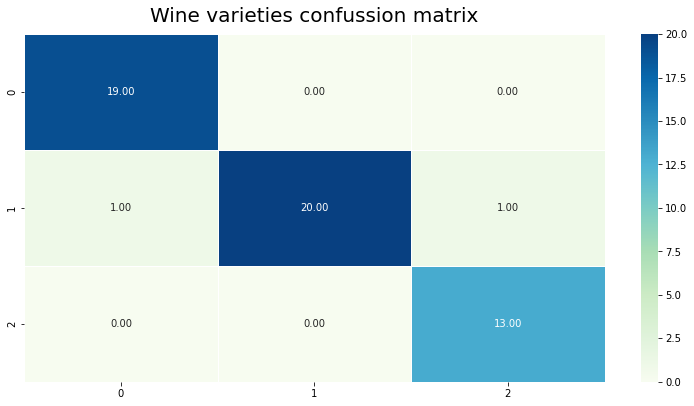

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
print(mcm)

import seaborn as sns

f, ax =plt.subplots(figsize=(13,6))
hm = sns.heatmap(
    np.round(mcm,2),
    annot=True,
    ax=ax,
    cmap="GnBu",
    fmt='.2f',
    linewidths=0.7
)
f.subplots_adjust(top=0.93)
#t = f.suptitle("Inssurance Health Correlation Heatmap", fontsize=14)
hm.set_title('Wine varieties confussion matrix', fontdict={'fontsize':20}, pad=12)



Now we use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

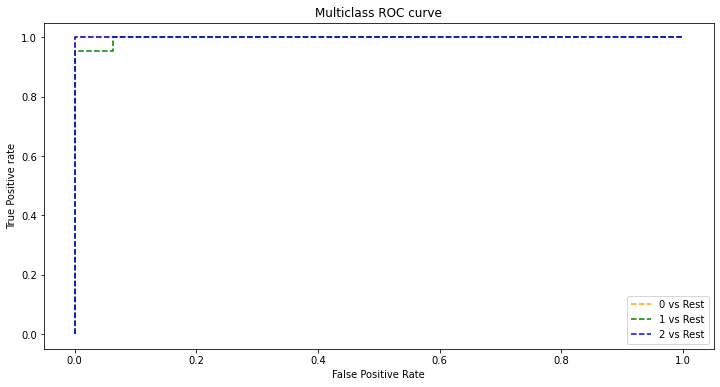

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

wine_proba = model.predict_proba(X_test)
classes = ['0','1','2']
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, wine_proba[:,i], pos_label=i)
    
# Plot the ROC chart
fig1 = plt.figure(figsize=(12,6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.

In [21]:
auc = roc_auc_score(y_test,wine_proba, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9990530303030303


Saving the model for using it elsewhere

In [22]:
import joblib

# Save the model as a pickle file
filename = 'wine_model.pkl'
joblib.dump(model, filename)

['wine_model.pkl']

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [30]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285],
    [12.37, 0.94, 1.36, 1.6, 88, 1.98, 0.57, 0.28, 0.42, 1.95, 1.05, 1.82, 520]]).astype('float64')
print ('New sample: {}'.format(x_new[0]))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

New sample: [1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
 1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
0 (0)
1 (1)


The conclussion here is that XGBclassifier with default parameters is enought to get an overall recall above 0.95 for this data set.  